# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query = base_url + "appid=" + weather_api_key + '&units=metric' + "&q=" + city

#list and record checker
record = 0
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
windspeed = []


#append lists for reach city found and print found status
for city in cities:
    record += 1
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    if (str(response) == '<Response [200]>'):
        print(f'Processing Record {record}: {city}')
        city_name.append(city_json['name'])
        cloudiness.append(city_json['clouds']['all'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
        humidity.append(city_json['main']['humidity'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        windspeed.append(city_json['wind']['speed'])
    else:
        print('City not found. Skipping...')
#     # this if statement will limit the amount of cities checked, use to avoid running all 500+ cities
#     if record >= 100:
#         break
    # sleep timer to prevent bandwidth maxing for API
    time.sleep(1)

    
#Turn appended lists into dictionary
weather_dict = {'City':city_name,
                'Cloudiness':cloudiness,
                'Country':country,
                'Date':date,
                'Humidity':humidity,
                'Lat':lat,
                'Lng':lng,
                'Max Temp':max_temp,
                'Wind Speed':windspeed}

#Turn dictionary into dataframe
weather_df = pd.DataFrame(weather_dict)

Processing Record 1: punta arenas
Processing Record 2: coihaique
Processing Record 3: half moon bay
Processing Record 4: victoria
Processing Record 5: mataura
Processing Record 6: san patricio
Processing Record 7: busselton
Processing Record 8: trincomalee
Processing Record 9: carnarvon
City not found. Skipping...
Processing Record 11: iquique
Processing Record 12: bilibino
Processing Record 13: gualaquiza
Processing Record 14: bredasdorp
City not found. Skipping...
Processing Record 16: qaanaaq
Processing Record 17: superior
Processing Record 18: pacific grove
City not found. Skipping...
Processing Record 20: rikitea
Processing Record 21: hobart
Processing Record 22: kaitangata
Processing Record 23: vila franca do campo
Processing Record 24: albany
Processing Record 25: jamestown
Processing Record 26: tasiilaq
Processing Record 27: pevek
Processing Record 28: shingu
Processing Record 29: saraland
Processing Record 30: hilo
City not found. Skipping...
Processing Record 32: skjervoy
Pro

City not found. Skipping...
Processing Record 263: mana
Processing Record 264: nabire
Processing Record 265: moussoro
Processing Record 266: almeirim
Processing Record 267: chara
Processing Record 268: pangkalanbuun
Processing Record 269: puerto escondido
Processing Record 270: alofi
Processing Record 271: vaitape
Processing Record 272: mayo
City not found. Skipping...
Processing Record 274: tungor
Processing Record 275: skibbereen
Processing Record 276: broome
Processing Record 277: grand gaube
Processing Record 278: tuatapere
Processing Record 279: sadove
Processing Record 280: kalmunai
Processing Record 281: hadrut
City not found. Skipping...
Processing Record 283: praia
City not found. Skipping...
Processing Record 285: hailar
Processing Record 286: dunedin
Processing Record 287: bereznik
Processing Record 288: provideniya
City not found. Skipping...
Processing Record 290: tomatlan
Processing Record 291: neiafu
Processing Record 292: suarez
Processing Record 293: genhe
Processing R

Processing Record 522: laguna
Processing Record 523: bandarbeyla
Processing Record 524: sunland park
Processing Record 525: krasnoye-na-volge
Processing Record 526: chiang khong
Processing Record 527: gizo
Processing Record 528: kumluca
Processing Record 529: abha
Processing Record 530: conde
Processing Record 531: taoudenni
Processing Record 532: henties bay
Processing Record 533: mackay
Processing Record 534: tulagi
Processing Record 535: longyearbyen
City not found. Skipping...
Processing Record 537: murgab
Processing Record 538: sioux lookout
Processing Record 539: erenhot
Processing Record 540: redcar
Processing Record 541: khorixas
Processing Record 542: oussouye
Processing Record 543: cotonou
Processing Record 544: okha
Processing Record 545: taicheng
Processing Record 546: neuquen
Processing Record 547: boqueirao
Processing Record 548: kangavar
Processing Record 549: gat
Processing Record 550: bizhbulyak
Processing Record 551: gao
City not found. Skipping...
Processing Record 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
# export dataframe to csv
export_csv = weather_df.to_csv (output_data_file, index = None, header=True)
# counts for Dataframe
weather_df.count()

weather_df.head(10)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,0,CL,1624154932,87,-53.1500,-70.9167,37.51,12.66
1,Coyhaique,90,CL,1624154934,87,-45.5752,-72.0662,37.35,5.75
2,Half Moon Bay,90,US,1624154935,69,37.4636,-122.4286,87.69,1.99
3,Hong Kong,100,HK,1624154651,79,22.2855,114.1577,91.96,7.00
4,Mataura,53,NZ,1624154806,82,-46.1927,168.8643,50.54,4.70
5,San Patricio,83,US,1624154940,68,28.0170,-97.5169,84.85,12.28
6,Busselton,31,AU,1624154647,83,-33.6500,115.3333,56.08,13.31
7,Trincomalee,99,LK,1624154943,75,8.5711,81.2335,82.15,17.78
8,Carnarvon,0,AU,1624154945,40,-24.8667,113.6333,66.27,4.61
9,Iquique,80,CL,1624154948,81,-20.2208,-70.1431,60.84,1.99


In [50]:
weather_df.describe()



,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,556.000000,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000
mean,55.127698,1.624155e+09,70.289568,19.727462,18.027359,68.117284,7.709335
std,39.310360,3.127072e+02,21.623743,33.192241,91.578819,14.002802,5.510825
min,0.000000,1.624155e+09,10.000000,-54.800000,-179.166700,30.090000,0.000000
25%,11.000000,1.624155e+09,60.000000,-7.269775,-64.350300,58.225000,3.420000
50%,64.000000,1.624155e+09,75.000000,23.790150,24.683350,69.790000,6.150000
75%,97.000000,1.624156e+09,87.000000,46.446375,101.891400,78.992500,11.500000
max,100.000000,1.624156e+09,100.000000,78.218600,179.316700,108.140000,30.870000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [51]:
#  Get the indices of cities that have humidity over 100%.


In [47]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

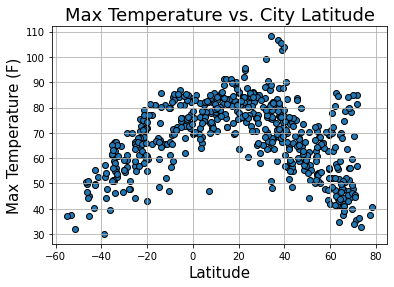

In [72]:

lat_temp_plot = plt.scatter(weather_df['Lat'],weather_df['Max Temp'],marker='o',edgecolors='black')
plt.grid()
plt.title('Max Temperature vs. City Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.savefig('lat_vs_maxtemp.png')
plt.show()

## Latitude vs. Humidity Plot

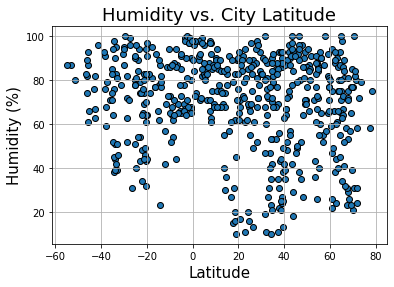

In [73]:

lat_hum_plot = plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker='o',edgecolors='black')
plt.grid()
plt.title('Humidity vs. City Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.savefig('lat_vs_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

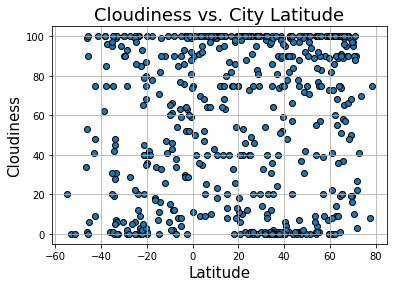

In [74]:

lat_cloud_plot = plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker='o',edgecolors='black')
plt.grid()
plt.title('Cloudiness vs. City Latitude',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness',size=15)
plt.savefig('lat_vs_coludiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

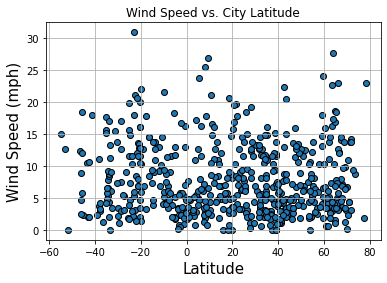

In [75]:
lat_ws_plot = plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],marker='o',edgecolors='black')
plt.grid()
plt.title('Wind Speed vs. City Latitude')
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.savefig('lat_vs_windspeed.png')
plt.show()

## Linear Regression

In [76]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere (Lat > 0)
weather_df_north = weather_df[weather_df['Lat'] >= 0]

#Southern Hemisphere (Lat < 0)
weather_df_south = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

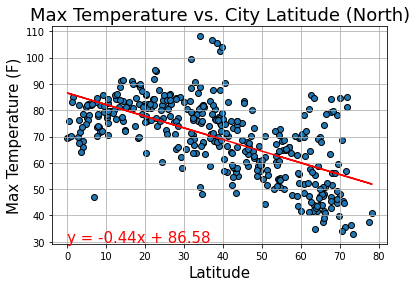

The r squared is: -0.6254632589173501


In [77]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

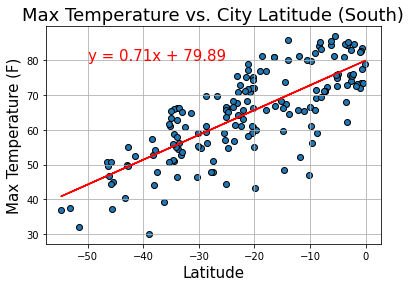

The r squared is: 0.7695865116427302


In [78]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,80),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

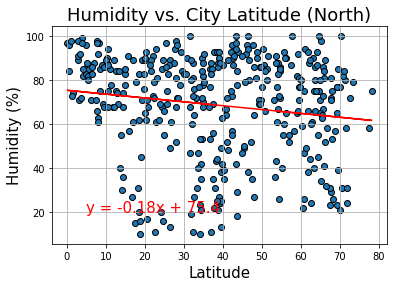

The r squared is: -0.1541053013417261


In [79]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

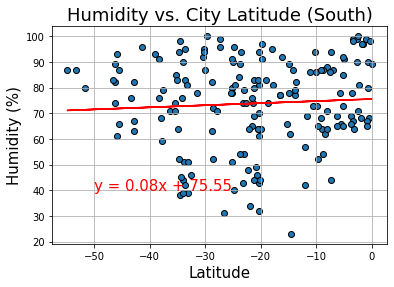

The r squared is: 0.06291402590085647


In [80]:

#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,40),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

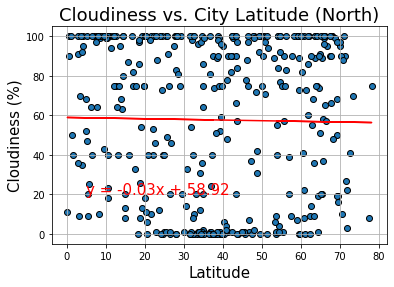

The r squared is: -0.01675596729218516


In [81]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

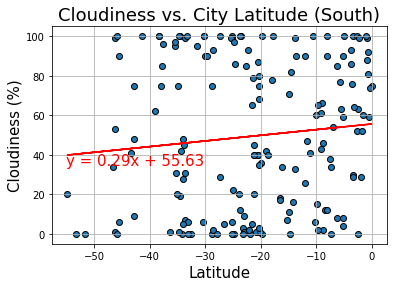

The r squared is: 0.10321168173014847


In [82]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,35),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness (%)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

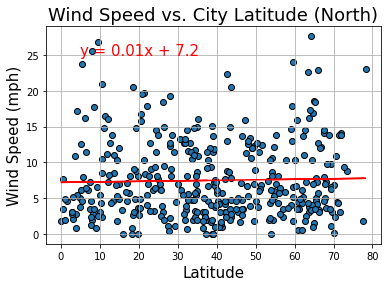

The r squared is: 0.02713840241397042


In [83]:
#setup linear regression and line equation
x_values = weather_df_north['Lat']
y_values = weather_df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(5,25),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

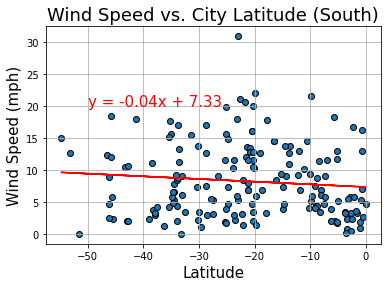

The r squared is: -0.09942238938074595


In [84]:
#setup linear regression and line equation
x_values = weather_df_south['Lat']
y_values = weather_df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,20),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed (mph)',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')